## 資料型態介紹

1. Panda基本介紹
    
    Pandas是一個基於Numpy的package，普遍用於數據操作
    有兩種特殊的資料型態dataframe和serises的差別

    > serises是一個一維的資料結構；dataframe則是二維的，像是表格的存在
    > 不同的數據處理函式，會需要不同的數據類型    

2. 基本數據類型介紹
    
    數值型態：
    > int：整數 integer，ex:1, 34, 50....，這次資料的All_Reaction_Count、LIKE_COUNT
    > float：浮點數 floating-point，含有小數點的,ex:1.4, 3.14
    > bool：布林值 boolean，判斷是或否，只會有兩種 TRUE/FALSE，另外索引後回傳的結果也是
    
    字串型態：
    > str：字串 string，用''或""包起來的文字資料，ex:"台灣基進"、"台灣民進黨"...或像是這次的Page_Name、Message
    > chr：字元 character，組成字串的元素，ex:"台"、"灣"...
    
    時間型態
    > timestamp：存時間的格式，像是這次的Date，雖然看起來是時間的格式，但會被電腦認為是str，需要後續轉換
    
    容器型態
    > list：

In [ ]:
import pandas as pd
csv_file = "D:/coding_resource/fourth_grade/politic_python/data/10802_2020_party.csv"
df = pd.read_csv(csv_file)

df.head(1)

這邊先拿Date欄位，當作series和dataframe比較的例子，
另外我們可以發現Date裡面雖然儲存的是日期，但卻是「字串」的形式。
所以後續在處理的時候，必須要再經過轉換才行。

In [ ]:
#series和dataframe
ser_a = df['Date']
type(ser_a)

df_a = pd.DataFrame(df['Date'])
type(df_a)

#看一下各自的資料型態
ser_a 
df_a

#Date原本的資料型太
ser_a
ser_a[0] #拿出index第0個的值

#從str轉換到Timestamp
type(ser_a[0])

ser_a = pd.to_datetime(ser_a)
type(ser_a[0])

## 資料分析環節

In [ ]:
import pandas as pd #讀取資料處理套件
df = pd.read_csv("D:/coding_resource/fourth_grade/politic_python/data/10802_2020_party.csv") #讀取csv，資料存在df這個變數裡面

In [5]:
df.tail() #顯示 df中前5個row

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
3801,2019/12/02 12:07:46,台灣基進,348571125292077,NaN,video,1,1,0,0,0,0,0,0,0,我是一個修船技術員，與台灣基進戰鬥，是我愛台灣的方式。\n \n身為一個工仔kang-á（工...,【我也支持】我是工人，我挺台灣基進,NaN,1575259666000
3802,2019/09/11 19:45:08,台灣民眾黨,104699394209550,NaN,video,0,0,0,0,0,0,0,0,0,【民眾黨黨徽複評直播中！ #Live】\n台灣民眾黨視覺識別徵選複評於今日8點正式開始，5件...,民眾黨黨徽複評直播,NaN,1568202308000
3803,2020/01/10 13:14:03,台灣基進,348571125292077,NaN,photo,0,0,0,0,0,0,0,0,0,返鄉搭車的時候看一下基進的政策啦\n詳細懶人包在留言處\n給我看喔👊👊👊,台灣基進,🍀『基進』，是讓希望成為可能🍀\n \n沒有 #國家安全，公平正義與經濟民生等進步課題...,1578633243000
3804,2019/04/10 22:32:53,基進黨（基進側翼）,348571125292077,NaN,video,1,0,0,1,0,0,0,0,0,「台灣，已在準戰爭狀態中！」\n「我們，該怎麼辦？」\n \n近期，沈柏洋老師演講的逐字稿...,【再見了！中國】專訪沈柏洋(Puma)：台灣已經準戰爭狀態？（精華版）,NaN,1554906773000
3805,2019/12/06 16:00:01,中國國民黨 KMT,131181017972,NaN,video,0,0,0,0,0,0,0,0,0,【空汙越來越嚴重，難道要用愛發電嗎？】\n\n「以核養綠」與「反燃煤電廠」公投雙雙過關，蔡英...,空汙越來越嚴重，難道要用愛發電嗎？,NaN,1575619201000


In [6]:
#看一下df這個資料裡面的'Page_Name'欄位有幾個粉專名稱(政黨)
dff = set(df['Page_Name'])
dff

{'中國國民黨 KMT', '台灣基進', '台灣民眾黨', '基進黨（基進側翼）', '時代力量 New Power Party', '民主進步黨'}

In [7]:
#找出各政黨按讚數超過1000的文章各有幾篇
#[]是索引的方式
party = df[(df['LIKE_COUNT'] > 1000)].groupby("Page_Name")
party.size() #顯示出party的結果

Page_Name
中國國民黨 KMT               307
台灣基進                    880
台灣民眾黨                   359
基進黨（基進側翼）                50
時代力量 New Power Party    302
民主進步黨                   787
dtype: int64

In [8]:
#把每個政黨每篇文章的按讚數相加
#變數      依據政黨粉專名稱分類   取按讚數       相加
p1 = party.get_group("台灣基進")['LIKE_COUNT'].agg('sum')
p2 = party.get_group("民主進步黨")['LIKE_COUNT'].agg('sum')
p3 = party.get_group("中國國民黨 KMT")['LIKE_COUNT'].agg('sum')
p4 = party.get_group("台灣民眾黨")['LIKE_COUNT'].agg('sum')
p5 = party.get_group("時代力量 New Power Party")['LIKE_COUNT'].agg('sum')

In [11]:
#把每個政黨的按讚總數，存成一個資料集dictionary

data = {'Name':['台灣基進', '民主進步黨', '中國國民黨 KMT', '台灣民眾黨', '時代力量 New Power Party'],
        'LIKE':[p1, p2, p3, p4, p5]}
data

dict

In [12]:
df.sort_values(by=['LOVE_COUNT'], inplace=True)

In [14]:
#???
#把剛剛存好的政黨讚數data，轉成dataframe，叫做likedata
likedata = pd.DataFrame(data)
likedata

,Name,LIKE
0,台灣基進,4393872
1,民主進步黨,3397500
2,中國國民黨 KMT,949674
3,台灣民眾黨,870808
4,時代力量 New Power Party,840840


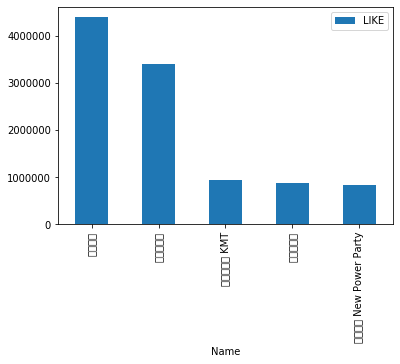

In [17]:
import matplotlib.pyplot as plt #載入要畫畫的套件，之後使用的時候呼叫plt就可以了

#設定中文字形
plt.rcParams['font.sans-serif']=['SimHei'] 
#剛剛的likedata，可以利用plot.bar畫圖，設定xy軸的值各是likedata的name和LIKE
likedata.plot.bar(x='Name', y='LIKE') 

In [28]:
print(df.shape)  #這個 DataFrame 有幾列有幾欄
print(df.index)  #這個 DataFrame 的列索引資訊
print(df.describe()) #對所有資料做基本統計
print(df['Page_Name'].unique()) #對看單個欄位的值有哪些
print ("each column has NaN\n", df.isnull().sum(),"\n") #計算空值

(3806, 18)
Int64Index([1902, 3719, 3709, 3707, 3703, 3698, 3692, 3644, 3615, 3603,
            ...
               6,   16,   38,   17,    8,   14,    2,    0,   10,    3],
           dtype='int64', length=3806)
            Page_ID  Link  All_Reaction_Count    LIKE_COUNT    WOW_COUNT  \
count  3.806000e+03   0.0         3806.000000   3806.000000  3806.000000   
mean   2.596224e+14   NaN         3327.254335   2938.954808    21.915134   
std    3.040331e+14   NaN         4308.677732   3827.583854    71.346803   
min    1.311810e+11   NaN            0.000000      0.000000     0.000000   
25%    1.503364e+11   NaN          961.500000    871.000000     1.000000   
50%    1.046994e+14   NaN         1946.000000   1760.000000     4.000000   
75%    3.485711e+14   NaN         4236.750000   3666.250000    15.000000   
max    8.910842e+14   NaN        80928.000000  74991.000000  1647.000000   

        LOVE_COUNT   HAHA_COUNT    SAD_COUNT   ANGRY_COUNT  Comment_Count  \
count  3806.000000  3806.00

## ==================================================================

## 切割並新增欄位
Date -> Year

In [23]:
df['Date'][0]
df['Date'][0].split("/")

['2020', '01', '11 20:07:46']

In [24]:
df['Year'] = df['Date'].apply(lambda x : x.split("/")[0])

## Your turn!

Date -> Month / Hour

In [180]:
likedata = pd.DataFrame(data)
likedata

,Name,LIKE
0,台灣基進,4393872
1,民主進步黨,3397500
2,中國國民黨 KMT,949674
3,台灣民眾黨,870808
4,時代力量 New Power Party,840840


## 找出comment數最多的文章內容

In [239]:
import pandas as pd
df = pd.read_csv("10802_2020.csv")
print(max(df.Comment_Count)) 
print(df[(df['Comment_Count'] == max(df.Comment_Count) )]['Message'])

28413
3    《2020 台灣要贏 LET'S WIN 開票之夜》
Name: Message, dtype: object


## Your turn!
找出 All_Reaction_Count數最少的文章內容



## 取各個政黨 like > 1000 的文章數


In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})

#count() 的用法是計算個數
#試試看sum(),mean(),median()...

likedf = df[(df['LIKE_COUNT'] > 1000)]
            .groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')


likedf = df[(df['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'All_Reaction_Count': '文章數'})
print(likedf)
print(likedf.columns.values)

              Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  \
3             基進黨（基進側翼）    50       50     0    50   50          50   
4  時代力量 New Power Party   302      302     0   302  302         302   
0             中國國民黨 KMT   307      307     0   307  307         307   
2                 台灣民眾黨   359      359     0   359  359         359   
5                 民主進步黨   787      787     0   787  787         787   
1                  台灣基進   880      880     0   880  880         880   

   WOW_COUNT  LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  \
3         50          50          50         50           50             50   
4        302         302         302        302          302            302   
0        307         307         307        307          307            307   
2        359         359         359        359          359            359   
5        787         787         787        787          787            787   
1        880         880    

## 畫成Bar Chart

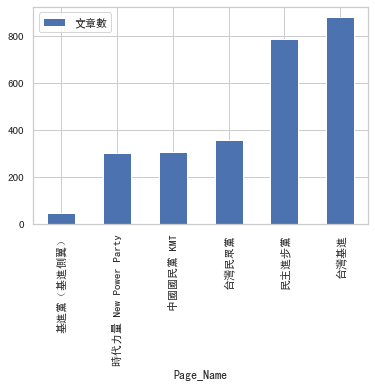

In [210]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

likedf.plot.bar(x='Page_Name', y='文章數')

## Your turn!

取出民進黨和國民黨文章中留言數>500的總讚數，並且畫成bar chart 

## 台灣民眾黨發布文章type的比例


In [283]:
import pandas as pd
df = pd.read_csv("10802_2020.csv")
df.head()
likedf =  df.groupby(['Page_Name','Type']).count().reset_index()
likedf =  likedf[likedf['Page_Name'] == '台灣民眾黨']
likedf['Page_ID'] = likedf['Page_ID'].apply(lambda x :x/likedf['Page_ID'].sum())
print(likedf['Page_ID'])

8     0.003759
9     0.500000
10    0.071429
11    0.424812
Name: Page_ID, dtype: float64


## 畫成 pie chart

([<matplotlib.patches.Wedge at 0x21f90a94088>,
 [Text(1.0999232825541922, 0.012991246868981803, 'link'),
  Text(-0.025980681637458668, 1.0996931409177986, 'photo'),
  Text(-1.0663402896640426, -0.2700340471851762, 'status'),
  Text(0.25742146943211297, -1.0694550888538574, 'video')],
 [Text(0.5999581541204684, 0.007086134655808255, '0.4%'),
  Text(-0.014171280893159272, 0.5998326223187992, '50.0%'),
  Text(-0.5816401579985686, -0.14729129846464156, '7.1%'),
  Text(0.14041171059933433, -0.5833391393748312, '42.5%')])

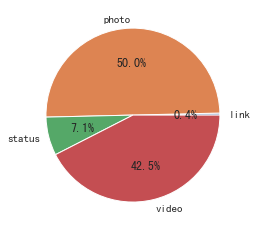

In [285]:
plt.pie(likedf['Page_ID'] , labels = likedf['Type'],autopct='%1.1f%%')

## Your turn!

取出各政黨的總發文數，並且畫成pie chart 

# 畫出各政黨每個月的發文趨勢

In [ ]:
import pandas as pd
csv_file = "D:/coding_resource/fourth_grade/politic_python/data/10802_2020_party.csv"
df = pd.read_csv(csv_file)

df.head(1)

首先我們把日期取出來，存到另外一個欄位Post_Date和Post_Year
注意：這裡是因為Date還是str的型態才可以這樣切，如果之後轉成datetime就會出現錯誤。

In [ ]:
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

In [ ]:
#格式化時間
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

## 折線圖
依據日期計算各政黨每個月的貼文成效
包括讚數、心情、留言等
p.s.注意有些欄位數字級距相差太大，放在同一張圖表會不好比較(ex:LIKE_COUNT、WOW_COUNT)

### 單個政黨貼文成效比較
每天民進黨獲得多少讚?

In [ ]:
#篩選各政黨的資料
df_green = df[(df["Page_Name"] == "民主進步黨" )]

#一次抓很多筆
like_green = df_green.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_green

#比較按讚數和留言數的數量
like_green.plot(x='Date',y=['LIKE_COUNT','Comment_Count','All_Reaction_Count'])

#### 畫法二：套件matplotlib

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("number of like") # 加標題
plt.xlabel("Post Time")     # 加x軸標題
plt.ylabel("number")        # 加y軸標題   

#可以用疊加的方式，把想要的變數畫上去
plt.plot(like_green['Date'],like_green['LIKE_COUNT'])
plt.plot(like_green['Date'],like_green['Comment_Count'])
plt.plot(like_green['Date'],like_green['All_Reaction_Count'])

## Your turn！
。請問基進黨的按讚數和留言數有相似的趨勢嗎？

### 每天國民黨發出多少文?
在這邊我們用groupby的方式，把每個政黨一天會發幾篇文算出來
再用matplotlib畫出來比較

In [ ]:
#把每個政黨每天發幾篇文算一次
df_post = df.groupby(['Page_Name','Post_Date'])['LIKE_COUNT'].count().reset_index(name='count')
#注意要加'reset_index(name='count')'才會變成dataframe
#df_post

#把國民黨單獨拿出來
df_blue = df_post[df_post['Page_Name']=='中國國民黨 KMT']
#df_tw = df_post[df_post['Page_Name']=='台灣基進']
#df_green = df_post[df_post['Page_Name']=='民主進步黨']

df_blue

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,4)) #設定圖表大小

plt.title("Number of Post") # 加標題
plt.xlabel("Time")          # 加x軸標題
plt.ylabel("Number of Post")        # 加y軸標題   

plt.plot(df_blue['Post_Date'],df_blue['count'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) #調整x軸要顯示幾個值
plt.show()

## Your turn！
。請畫出民進黨每天的發文折線圖

## 畫出各政黨每個月的發文熱圖

這次我們抓出單一政黨，看該粉專哪個時間的發文頻率最高
顏色最深的色塊代表發文熱度最高

In [ ]:
#選出國民黨的發文
df_blue = df[df['Page_Name']=='中國國民黨 KMT']

#算每星期每小時發了幾篇
df_post_blue = df.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

df_post_blue

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

flights = df_post_blue.pivot("Week", "Hour", "count")
# 畫出x-y-z的圖，比如 年-月-銷量 的熱圖
f, ax = plt.subplots(figsize=(9, 6))
#使用不同的顏色
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
#設置座標字體方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

## Your turn！
。請問總體來看，最熱門的發文時段是哪時候？